In [30]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from data_analysis.utils import user
from data.paths.parquet_paths import USER, REVIEW

In [31]:
user_df = pd.read_parquet(str(USER))
review_df = pd.read_parquet(str(REVIEW))

In [32]:
user_df = user.prepare_user_df(user_df)

In [33]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10000 non-null  object        
 1   name                10000 non-null  object        
 2   review_count        10000 non-null  int32         
 3   yelping_since       10000 non-null  datetime64[ns]
 4   friends             10000 non-null  object        
 5   useful              10000 non-null  int32         
 6   funny               10000 non-null  int32         
 7   cool                10000 non-null  int32         
 8   fans                10000 non-null  int32         
 9   elite               0 non-null      object        
 10  average_stars       10000 non-null  float32       
 11  compliment_hot      10000 non-null  int32         
 12  compliment_more     10000 non-null  int32         
 13  compliment_profile  10000 non-null  int32      

In [34]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float32
 4   date         100000 non-null  object 
 5   text         100000 non-null  object 
 6   useful       100000 non-null  int32  
 7   funny        100000 non-null  int32  
 8   cool         100000 non-null  int32  
dtypes: float32(1), int32(3), object(5)
memory usage: 5.3+ MB


In [35]:
# user_df['user_id'] = user_df['user_id'].astype(str)
# review_df['user_id'] = review_df['user_id'].astype(str)

user_columns = [
    'user_id',
    'name',
    'review_count',
    'yelping_since',
    # 'useful',
    # 'funny',
    # 'cool',
    'fans',
    'average_stars'
]


review_user_df = review_df.join(user_df[user_columns].set_index('user_id'), on='user_id')
review_user_df['date'] = pd.to_datetime(review_user_df['date'])

In [36]:
review_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   review_id      100000 non-null  object        
 1   user_id        100000 non-null  object        
 2   business_id    100000 non-null  object        
 3   stars          100000 non-null  float32       
 4   date           100000 non-null  datetime64[ns]
 5   text           100000 non-null  object        
 6   useful         100000 non-null  int32         
 7   funny          100000 non-null  int32         
 8   cool           100000 non-null  int32         
 9   name           8279 non-null    object        
 10  review_count   8279 non-null    float64       
 11  yelping_since  8279 non-null    datetime64[ns]
 12  fans           8279 non-null    float64       
 13  average_stars  8279 non-null    float32       
dtypes: datetime64[ns](2), float32(2), float64(2), int32(3

In [37]:
review_user_df = review_user_df.loc[~review_user_df['name'].isna()].copy()

In [38]:
review_user_df.sample(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars
69832,a45ty6MnDAiNGwuaacS81A,5snWEoA7Qsu-H7nY4aTpAQ,fQ7oepP_GAZGGzeVPdCueA,1.0,2011-06-30,What are we rating here..the outward appearanc...,26,5,8,Mila,138.0,2010-03-15 21:20:04,5.0,3.52
47229,BHet9IkAC_54ma7CfskxnQ,9rHSwmHoqihbaxm3pKKw9Q,rcaPajgKOJC2vo_l3xa42A,3.0,2010-10-08,It was a Saturday morning and after losing my ...,1,0,1,Wendy,124.0,2009-09-30 11:05:30,5.0,3.94


<AxesSubplot: >

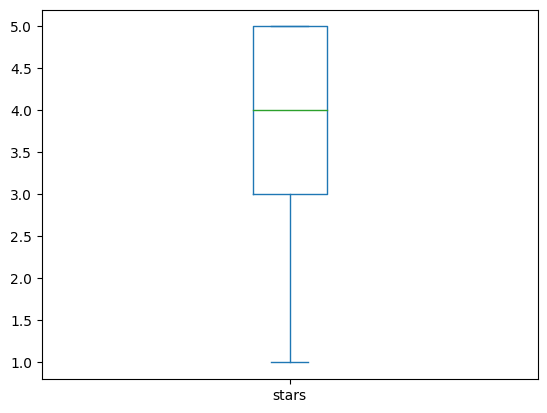

In [39]:
review_user_df.groupby('user_id')['stars'].mean().plot(kind='box')

In [40]:
# early reviews: within month or two after yelping since
youth_threshold = timedelta(days=60)
early_reviews = review_user_df[review_user_df.date - review_user_df.yelping_since < youth_threshold]

early_reviews[['date', 'yelping_since', 'stars', 'user_id']].sample(10)

early_reviews = early_reviews.groupby('user_id').agg(list)
early_reviews.reset_index(inplace=True)
early_reviews['count'] = early_reviews['name'].apply(lambda x: len(x))
early_reviews[early_reviews['count'] >= 3].sample(3)

,user_id,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
445,ko06Ptkr1YtZWR6FIDqubA,"[E4wbBwxd9a-kdYlwMicdug, 0egMW4jW-clStCJ0qLd_t...","[XnJeadLrlj9AZB8qSdIR2Q, soS5sCwyfguTF5AT4yB5O...","[5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.0]","[2007-06-11 00:00:00, 2007-06-25 00:00:00, 200...",[I don't know if I will ever experience someth...,"[2, 2, 4, 2, 1, 0, 3, 4, 0]","[0, 0, 2, 0, 1, 0, 0, 2, 0]","[5, 0, 2, 2, 1, 0, 1, 2, 0]","[Jennifer, Jennifer, Jennifer, Jennifer, Jenni...","[142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142...","[2007-05-20 00:21:24, 2007-05-20 00:21:24, 200...","[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40....","[4.340000152587891, 4.340000152587891, 4.34000...",9
391,eZL71e58edZJlYkpkpUqig,"[JiH8TqWBTD-JNvJSgrMq6w, iZlCC3m7sF_cP0ngKA20v...","[rcaPajgKOJC2vo_l3xa42A, 91EhRceds781OLo3M4BDr...","[5.0, 4.0, 4.0]","[2008-12-16 00:00:00, 2008-12-10 00:00:00, 200...",[Perfectly prepared French bistro fare in a ch...,"[1, 2, 3]","[0, 0, 3]","[1, 1, 3]","[Heather, Heather, Heather]","[68.0, 68.0, 68.0]","[2008-12-01 04:06:21, 2008-12-01 04:06:21, 200...","[3.0, 3.0, 3.0]","[3.890000104904175, 3.890000104904175, 3.89000...",3
428,iw_6JAAw9FAIv2YkbLcMFA,"[CW5sFyWT6Mdf6XqBknpJGA, KuSr8RyS4at1MFHIjc3Jg...","[ijg7qQCYnhUWBd5JUxbfvA, GHwn0lza-JdaETNbOw98o...","[4.0, 4.0, 5.0, 3.0]","[2006-02-05 00:00:00, 2006-02-06 00:00:00, 200...",[At first glance this is just another 50's ret...,"[0, 1, 1, 0]","[0, 0, 0, 0]","[1, 0, 0, 0]","[Dan, Dan, Dan, Dan]","[415.0, 415.0, 415.0, 415.0]","[2006-01-22 23:44:43, 2006-01-22 23:44:43, 200...","[19.0, 19.0, 19.0, 19.0]","[3.7899999618530273, 3.7899999618530273, 3.789...",4


In [41]:
review_bursts = review_user_df.groupby(['user_id', 'date']).agg(list)
review_bursts.reset_index(inplace=True)
review_bursts['count'] = review_bursts['name'].apply(lambda x: len(x))
review_bursts[review_bursts['count'] >= 3].sample(3)

,user_id,date,review_id,business_id,stars,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
1795,EK8MTw_sYvMssXvyux7VgQ,2008-08-26,"[ndPj6d-ee8kI6ixqdGef_Q, iROuQzYAwi06SOleKm0Pf...","[9oeXU6ji4o6yDlA2Ga8iug, Cy9LmQrY9rWwaNTSqxQn6...","[4.0, 4.0, 5.0, 4.0]",[Okay so once in a while I don't feel like squ...,"[6, 1, 1, 0]","[9, 0, 2, 1]","[2, 0, 2, 0]","[Erin, Erin, Erin, Erin]","[124.0, 124.0, 124.0, 124.0]","[2008-08-21 15:09:34, 2008-08-21 15:09:34, 200...","[16.0, 16.0, 16.0, 16.0]","[3.7300000190734863, 3.7300000190734863, 3.730...",4
2040,GXn4ZsasLKh0qZ5g3nIqcQ,2005-10-28,"[3U_7QOHLkwQ2HSeYiYe6EA, wYzjLVDWjz5DNTXCChXDw...","[VgGO13Fx7dQj4zg3IuVDLw, ues2rFe_hbRC7s232PX5Q...","[4.0, 3.0, 5.0]",[I'm with Kate all the way on this place. It's...,"[2, 1, 2]","[0, 0, 2]","[0, 0, 1]","[Michael, Michael, Michael]","[629.0, 629.0, 629.0]","[2005-01-03 18:01:35, 2005-01-03 18:01:35, 200...","[99.0, 99.0, 99.0]","[3.819999933242798, 3.819999933242798, 3.81999...",3
4937,c8qFkI_VusWo0xZvkjfBWQ,2005-05-26,"[aG8DkGSVcvIchm7mjDjzYw, euU8avFp6j1noN70fulyl...","[ODTI9W7fHMKNWZ3g8VcFUg, gn8cZOxQIZNUeiHcJ0WxM...","[3.0, 3.0, 3.0, 5.0, 3.0]",[I thought the food here to be a little on the...,"[1, 0, 0, 0, 0]","[0, 0, 1, 0, 0]","[1, 0, 1, 0, 0]","[matthew, matthew, matthew, matthew, matthew]","[366.0, 366.0, 366.0, 366.0, 366.0]","[2005-05-14 16:32:28, 2005-05-14 16:32:28, 200...","[21.0, 21.0, 21.0, 21.0, 21.0]","[3.8299999237060547, 3.8299999237060547, 3.829...",5


In [42]:
# ~14 years * ~50 weeks
bins_count = 700
review_user_df['date_bin'] = pd.cut(review_user_df['date'], bins=bins_count, labels=range(bins_count))

review_bursts_binned = review_user_df.groupby(['user_id', 'date_bin']).agg(list)
review_bursts_binned.reset_index(inplace=True)
review_bursts_binned = review_bursts_binned.dropna()
review_bursts_binned['count'] = review_bursts_binned['name'].apply(lambda x: len(x))
review_bursts_binned[review_bursts_binned['count'] >= 3].sample(3)

,user_id,date_bin,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
1671159,VYqRk78kesHn86jPngPUXQ,259,"[l2SN7RLHRSS6fHN0v6iNNA, _s0nL7EOjo168gipW3J16...","[xmARZ_MuSfrQCXP4e8RQjg, 6ZIHxvFTHC1pvAzAS0uLD...","[4.0, 4.0, 4.0]","[2010-03-16 00:00:00, 2010-03-16 00:00:00, 201...",[This is one of my favorite lunch spots. Their...,"[2, 1, 4]","[0, 1, 3]","[2, 3, 4]","[Sara, Sara, Sara]","[107.0, 107.0, 107.0]","[2009-09-27 16:56:19, 2009-09-27 16:56:19, 200...","[6.0, 6.0, 6.0]","[3.8299999237060547, 3.8299999237060547, 3.829...",3
753459,DYoTXaKxFLaUh7MiWSbgjw,259,"[W72kkXmScCRD8wkLbMJAoQ, V8ZtL_rZ587TqAt0t_4Vv...","[uSxWwjS7wbK2XeVwlgSqdw, 0EUohlWGBPnIgzCULyWl7...","[3.0, 2.0, 3.0]","[2010-03-15 00:00:00, 2010-03-15 00:00:00, 201...",[Rather than going to a gun range and shooting...,"[6, 2, 0]","[3, 0, 1]","[1, 0, 0]","[chris, chris, chris]","[201.0, 201.0, 201.0]","[2008-10-31 04:48:57, 2008-10-31 04:48:57, 200...","[8.0, 8.0, 8.0]","[3.5299999713897705, 3.5299999713897705, 3.529...",3
1846093,Yp7_GeD6KTRoo4Nteqv4SA,193,"[jThHNyO8oHs8CrncwzHhKQ, o6yLz-tcuLe65HhXkjuv1...","[Qit5T2k6_gcu4BH4EYTsVw, sjJOsKnXxsQodXMr1i8fs...","[5.0, 3.0, 4.0, 4.0]","[2008-12-04 00:00:00, 2008-12-04 00:00:00, 200...",[Going to the Toronto Island on a summer day i...,"[4, 0, 2, 1]","[1, 0, 2, 0]","[1, 0, 0, 0]","[Melissa, Melissa, Melissa, Melissa]","[327.0, 327.0, 327.0, 327.0]","[2008-10-12 21:24:42, 2008-10-12 21:24:42, 200...","[14.0, 14.0, 14.0, 14.0]","[3.640000104904175, 3.640000104904175, 3.64000...",4


In [43]:
early_reviewers = set(early_reviews['user_id'])
oneday_burst_reviewers = set(review_bursts['user_id'])
oneweek_burst_reviewers = set(review_bursts_binned['user_id'])

print(f'1d / 1w: {len(oneday_burst_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1w: {len(early_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1d: {len(early_reviewers.intersection(oneday_burst_reviewers))}')

1d / 1w: 4692
early / 1w: 558
early / 1d: 558


In [44]:
from data.paths.parquet_paths import BUSINESS
from data_analysis.utils import business

business_df = pd.read_parquet(str(BUSINESS))
business_df = business.prepare_business_df(business_df)
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, iBof5Tl8vrKISbi82tFEvQ to 9999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        10000 non-null  object 
 1   address                     10000 non-null  object 
 2   city                        10000 non-null  object 
 3   state                       10000 non-null  object 
 4   postal_code                 10000 non-null  object 
 5   latitude                    10000 non-null  float32
 6   longitude                   10000 non-null  float32
 7   stars                       10000 non-null  float32
 8   review_count                10000 non-null  float64
 9   is_open                     10000 non-null  float64
 10  categories                  10000 non-null  object 
 11  hours                       7716 non-null   object 
 12  AcceptsInsurance            413 non-null    object 
 13  AgesAllowed     

In [45]:
# Searching for home state
# taking users activity
# grouping by user
# checking for the most visted / visited for longest time

review_place_df = review_user_df[['user_id', 'business_id', 'date']]
review_place_df = review_place_df.join(business_df[['city', 'state', 'latitude', 'longitude']], rsuffix='_business', on='business_id')
review_place_df = review_place_df.dropna()
review_place_df

,user_id,business_id,date,city,state,latitude,longitude
3,zEOuNc4K40aw-GE6y8RgIg,Y6FNieFd5UKhJ3a6FbQhyg,2014-07-28,Gilbert,AZ,33.378639,-111.755966
34,fJezNrc49UX9gONGNJ4YUQ,4gwh0q7JsdzHIm_pdYUlZg,2013-02-22,Scottsdale,AZ,33.539532,-111.924576
82,UYcmGbelzRa0Q6JqzLoguw,Er5XAY2UFGGqBHdqpeCFkA,2013-08-04,Las Vegas,NV,36.010628,-115.174904
87,whqfWVBj4x5EDboIVDOymQ,CsLQLiRoafpJPJSkNX2h5Q,2010-03-13,Charlotte,NC,35.194893,-80.767441
93,Y1ICO26IsN7i_1OVD0Inyw,GHs7grPeyVPwmiVKhhfMvg,2008-05-02,Glendale,AZ,33.534256,-112.261200
...,...,...,...,...,...,...,...
99827,Wmh9vK9LX-sxeuTb6vzM2A,36pB0QVVNZuOLV_UxosbAQ,2018-08-27,Montréal,QC,45.479313,-73.584496
99830,U13tLFucJNz1fNv_Xgdj0g,WCqcYtJ4rUxA4bIzjOfzqg,2013-05-11,Charlotte,NC,35.226147,-80.844231
99856,PYRIiQilTl1rkx83hm8ttA,LHXisknIbUy_XtdEQc7x9w,2014-05-13,Las Vegas,NV,36.060051,-115.164833
99892,SBsQvmEEYJsD6xeRzHxf8Q,aRqxT28Tdz2aDiZ7Vkyejw,2013-06-01,Toronto,ON,43.664177,-79.414963


In [46]:
state_mode = (review_place_df
    .groupby(['user_id'])['state']
    .agg(lambda x: pd.Series.mode(x)[0])
    .reset_index()
    .set_index('user_id'))
city_mode = (review_place_df
    .groupby(['user_id'])['city']
    .agg(lambda x: pd.Series.mode(x)[0])
    .reset_index()
    .set_index('user_id'))

user_home_byvisits = state_mode.join(city_mode, on='user_id')
user_home_byvisits.reset_index()

,user_id,state,city
0,---1lKK3aKOuomHnwAkAow,NV,Las Vegas
1,--RlSfc-QmcHFGHyX6aVjA,NV,Las Vegas
2,-1BrzE0pqO_EVw9SGzHEnw,NV,Las Vegas
3,-6J2VjbeLWAHsyAB8VN7bA,AZ,Glendale
4,-6iqrpnSPBW2plS8y7-cLA,NC,Charlotte
...,...,...,...
2750,zwmw_cNa5DzJotaFOHTvQg,AZ,Scottsdale
2751,zx6gq8IslnAwCyCUztXn1A,AZ,Scottsdale
2752,zy2ImADN9B0cvIRCC3d0Zg,AZ,Gilbert
2753,zyNGr5Tlg1rK1frevXCx2g,AZ,Scottsdale


In [47]:
# How to check by time?
# for each pair of reviews from same state/city count deltas between visits, max delta is homestate, homecity
from itertools import combinations

state_delta = review_place_df.groupby(['user_id', 'state']).apply(lambda x:
    sum(map(lambda dates: abs((dates[1] - dates[0]).days), combinations(x['date'], 2))))
    
state_mode_time = (state_delta.groupby(['user_id', 'state'])
    .max()
    .reset_index()[['user_id', 'state']]
    .drop_duplicates(['user_id'])
    .set_index('user_id'))

city_delta = review_place_df.groupby(['user_id', 'city']).apply(lambda x:
    sum(map(lambda dates: abs((dates[1] - dates[0]).days), combinations(x['date'], 2))))
city_mode_time = (city_delta.groupby(['user_id', 'city'])
    .max()
    .reset_index()[['user_id', 'city']]
    .drop_duplicates(['user_id'])
    .set_index('user_id'))

user_home_bydelta = state_mode_time.join(city_mode_time, on='user_id')
user_home_bydelta.reset_index()

,user_id,state,city
0,---1lKK3aKOuomHnwAkAow,NV,Las Vegas
1,--RlSfc-QmcHFGHyX6aVjA,NV,Las Vegas
2,-1BrzE0pqO_EVw9SGzHEnw,NV,Las Vegas
3,-6J2VjbeLWAHsyAB8VN7bA,AZ,Glendale
4,-6iqrpnSPBW2plS8y7-cLA,NC,Charlotte
...,...,...,...
2750,zwmw_cNa5DzJotaFOHTvQg,AZ,Scottsdale
2751,zx6gq8IslnAwCyCUztXn1A,AZ,Scottsdale
2752,zy2ImADN9B0cvIRCC3d0Zg,AZ,Gilbert
2753,zyNGr5Tlg1rK1frevXCx2g,AZ,Scottsdale


In [48]:
user_home_byvisits.compare(user_home_bydelta, keep_shape=True).dropna()

state              city           
                        self other        self      other
user_id                                                  
37HswRimgBEf7_US-c3CDA    NV    NC   Las Vegas  Charlotte
CxDOIDnH8gp9KXzpBHJYXw    ON    OH     Markham  Cleveland
U4INQZOPSUaj8hMjLlZ3KA    NV    AZ   Las Vegas  Henderson
hLVq7VSJBHZwqurwWoCmpg    PA    NV  Pittsburgh  Las Vegas

In [49]:
review_user_df = review_user_df.join(business_df['state'], on='business_id')
review_user_df['state'].dropna()

3        AZ
34       AZ
82       NV
87       NC
93       AZ
         ..
99827    QC
99830    NC
99856    NV
99892    ON
99944    PA
Name: state, Length: 4023, dtype: object

In [50]:
review_user_df = review_user_df.join(user_home_byvisits['state'], on='user_id', rsuffix='_user')
review_user_df['state_user'].dropna()

3        AZ
34       AZ
36       AZ
66       NV
68       AZ
         ..
99916    AZ
99920    NC
99924    AZ
99935    NV
99944    PA
Name: state_user, Length: 6044, dtype: object

In [64]:
test = review_user_df.apply(lambda x:
    if x.state is None :
        return 'unknown'
    if x.state == x.state_user:
        return 'local' 
    else:
        return 'tourist', 
    axis=1)

test
# review_user_df = review_user_df.drop(['state', 'state_user'])
# review_user_df

3          local
7        tourist
21       tourist
34         local
36       tourist
          ...   
99916    tourist
99920    tourist
99924    tourist
99935    tourist
99944      local
Length: 8279, dtype: object